In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [50]:
result_base_dir = './recode/IMPUTEDLIBD/'
result_files = [i for i in os.listdir(result_base_dir) if i.endswith('.csv')]

dfs = []

for f in result_files:
    df_dir = os.path.join(result_base_dir,f)
    dfs.append(pd.read_csv(df_dir,index_col=0))

dfs = pd.concat(dfs)

dfs['pre_type'] = dfs['pre_type'].map(
    {
    'raw':'Default preprocessing',
    's.impute_p':'Spanve imputation',
    'spanve_impute':'Spanve imputation'
    }
)
dfs = dfs.dropna()

dfs.loc[dfs['clust_method'] == 'bayes_space','clust_method'] = 'BayesSpace'

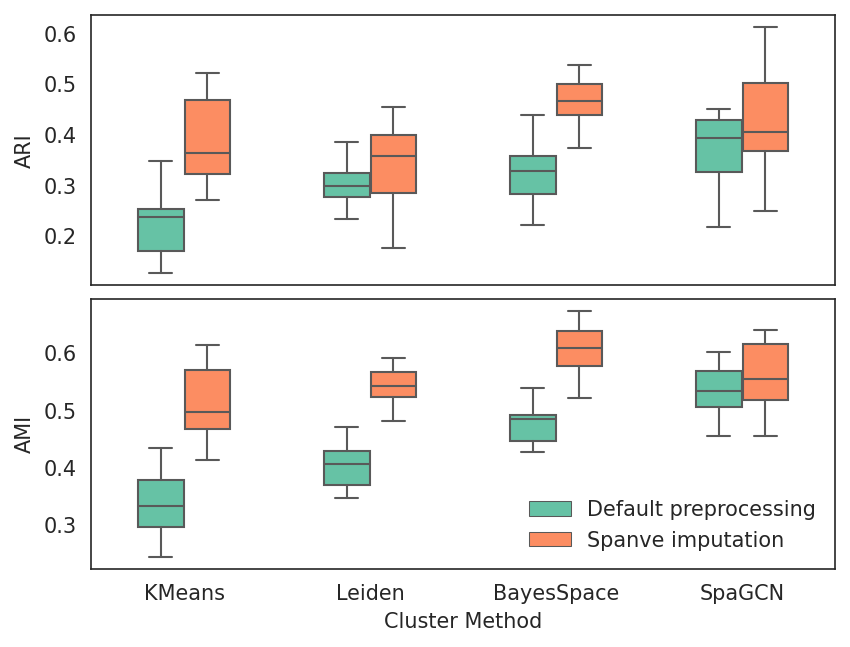

In [80]:
sns.set_style(style='white')

f,axes = plt.subplots(2,1,dpi=150) 
f.subplots_adjust(hspace=0.05)
cmap = 'Set2'
sns.boxplot(
    data=dfs,
    y='ari',x='clust_method',hue='pre_type',
    ax=axes[0],palette =cmap,saturation=1,
    width=0.5,linewidth=1
)
axes[0].legend_.set_visible(False)
axes[0].set_xticks([])
axes[0].set_xlabel('')
axes[0].set_ylabel('ARI')

sns.boxplot(
    data=dfs,
    y='ami',x='clust_method',hue='pre_type',
    ax=axes[1],palette=cmap,saturation=1,
    width=0.5,linewidth=1,fliersize=0
)
axes[1].legend(title = None,edgecolor='#ffffff')
axes[1].set_ylabel('AMI')
axes[1].set_xlabel('Cluster Method')

f.savefig('./Results/Imputation_clust.pdf',bbox_inches='tight')